#Preliminary analysis of a voter file.    


In [1]:
#read in file
import pandas as pd

pd.set_option('display.max_columns', 150)

In [2]:
voter_file_df = pd.read_csv("HAMILTON.txt", sep=',')

C:\Users\kevin\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (58,64,66,67,73,74,78,79,82,87,93,96,97,100,103,106) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
voter_file_df.sample(5)

,SOS_VOTERID,COUNTY_NUMBER,COUNTY_ID,LAST_NAME,FIRST_NAME,MIDDLE_NAME,SUFFIX,DATE_OF_BIRTH,REGISTRATION_DATE,VOTER_STATUS,PARTY_AFFILIATION,RESIDENTIAL_ADDRESS1,RESIDENTIAL_SECONDARY_ADDR,RESIDENTIAL_CITY,RESIDENTIAL_STATE,RESIDENTIAL_ZIP,RESIDENTIAL_ZIP_PLUS4,RESIDENTIAL_COUNTRY,RESIDENTIAL_POSTALCODE,MAILING_ADDRESS1,MAILING_SECONDARY_ADDRESS,MAILING_CITY,MAILING_STATE,MAILING_ZIP,MAILING_ZIP_PLUS4,MAILING_COUNTRY,MAILING_POSTAL_CODE,CAREER_CENTER,CITY,CITY_SCHOOL_DISTRICT,COUNTY_COURT_DISTRICT,CONGRESSIONAL_DISTRICT,COURT_OF_APPEALS,EDU_SERVICE_CENTER_DISTRICT,EXEMPTED_VILL_SCHOOL_DISTRICT,LIBRARY,LOCAL_SCHOOL_DISTRICT,MUNICIPAL_COURT_DISTRICT,PRECINCT_NAME,PRECINCT_CODE,STATE_BOARD_OF_EDUCATION,STATE_REPRESENTATIVE_DISTRICT,STATE_SENATE_DISTRICT,TOWNSHIP,VILLAGE,WARD,PRIMARY-03/07/2000,GENERAL-11/07/2000,SPECIAL-05/08/2001,GENERAL-11/06/2001,PRIMARY-05/07/2002,GENERAL-11/05/2002,SPECIAL-05/06/2003,GENERAL-11/04/2003,PRIMARY-03/02/2004,GENERAL-11/02/2004,SPECIAL-02/08/2005,PRIMARY-05/03/2005,PRIMARY-09/13/2005,GENERAL-11/08/2005,SPECIAL-02/07/2006,PRIMARY-05/02/2006,GENERAL-11/07/2006,PRIMARY-05/08/2007,PRIMARY-09/11/2007,GENERAL-11/06/2007,PRIMARY-11/06/2007,GENERAL-12/11/2007,PRIMARY-03/04/2008,PRIMARY-10/14/2008,GENERAL-11/04/2008,GENERAL-11/18/2008,PRIMARY-05/05/2009,PRIMARY-09/08/2009,PRIMARY-09/15/2009,PRIMARY-09/29/2009,GENERAL-11/03/2009,PRIMARY-05/04/2010,PRIMARY-07/13/2010,PRIMARY-09/07/2010,GENERAL-11/02/2010,PRIMARY-05/03/2011,PRIMARY-09/13/2011,GENERAL-11/08/2011,PRIMARY-03/06/2012,GENERAL-11/06/2012,PRIMARY-05/07/2013,PRIMARY-09/10/2013,PRIMARY-10/01/2013,GENERAL-11/05/2013,PRIMARY-05/06/2014,GENERAL-11/04/2014,PRIMARY-05/05/2015,PRIMARY-09/15/2015,GENERAL-11/03/2015,PRIMARY-03/15/2016,GENERAL-06/07/2016,PRIMARY-09/13/2016,GENERAL-11/08/2016,PRIMARY-05/02/2017,PRIMARY-09/12/2017,GENERAL-11/07/2017,PRIMARY-05/08/2018,GENERAL-08/07/2018,GENERAL-11/06/2018,PRIMARY-05/07/2019,PRIMARY-09/10/2019,GENERAL-11/05/2019,PRIMARY-03/17/2020
294430,OH0020793760,31,1692392,FATTORE,CHRISTIE,A,NaN,1957-09-12,2009-06-06,ACTIVE,R,1416 GRAND OAKS DR,NaN,CINCINNATI,OH,45255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,NaN,NaN,NaN,2,1,HAMILTON COUNTY ESC,NaN,NaN,FOREST HILLS LOCAL SD (HAMILTON),HAMILTON-CO,ANDERSON K,31-AZO,4,27,7,ANDERSON TWP.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,X,NaN,NaN,X,R,X,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,R,NaN,NaN,X,NaN,NaN,X,NaN,NaN,X,NaN,NaN,X,NaN
483132,OH0024202034,31,1944472,BOND,KELCIE,BURKE,NaN,1989-05-24,2016-12-22,CONFIRMATION,NaN,7912 LOCUST LN,NaN,CINCINNATI,OH,45243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,MADEIRA CITY,MADEIRA CITY SD,NaN,2,1,NaN,NaN,NaN,NaN,HAMILTON-CO,MADEIRA G,31-ATF,4,28,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142284,OH0013583948,31,423411,FERRARI,FAUSTO,NaN,NaN,1927-09-03,1989-07-17,CONFIRMATION,NaN,3418 WHITFIELD AVE,NaN,CINCINNATI,OH,45220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CINCINNATI CITY,CINCINNATI PUBLIC SCHOOLS CITY SD,NaN,1,1,NaN,NaN,NaN,NaN,HAMILTON-CO,CINCINNATI 15-E,31-AJR,4,31,9,NaN,NaN,CINTI WARD 15,D,X,NaN,X,NaN,X,NaN,X,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,X,NaN,NaN,X,NaN,NaN,D,NaN,X,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121238,OH0013959344,31,25138,BITTNER,SCOTT,E,NaN,1947-07-14,1989-07-17,ACTIVE,R,5695 JESSUP RD,NaN,CINCINNATI,OH,45247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,HAMILTON COUNTY ESC,NaN,NaN,NORTHWEST LOCAL SD (HAMILTON),HAMILTON-CO,GREEN P,31-BIB,4,30,8,GREEN TWP.,NaN,NaN,R,X,NaN,X,NaN,X,NaN,X,R,X,NaN,NaN,NaN,X,NaN,R,X,NaN,NaN,X,Na

In [4]:
from datetime import date, timedelta
import time
import datetime
import numpy as np

In [5]:
today = date.today()
age_list = []
for dob in voter_file_df['DATE_OF_BIRTH']:
    dob_time = time.strptime(dob, '%Y-%m-%d')
    age = today.year - dob_time.tm_year + (today.month - dob_time.tm_mon)/12
    age_list.append(age)

voter_file_df['AGE'] = age_list

In [6]:
voter_file_df['AGE'].describe()

count    584593.000000
mean         48.305150
std          18.882683
min          17.750000
25%          32.083333
50%          46.750000
75%          62.583333
max         220.583333
Name: AGE, dtype: float64

#People probably aren't 200+ years old.  Let's purge bad records.

In [7]:
voter_file_df[voter_file_df['AGE'] > 100]['DATE_OF_BIRTH'].value_counts()

1800-01-01    304
1920-05-22      3
1919-11-15      2
1920-03-25      2
1920-01-26      2
             ... 
1918-08-23      1
1919-11-10      1
1918-12-31      1
1916-10-17      1
1917-06-25      1
Name: DATE_OF_BIRTH, Length: 226, dtype: int64

In [8]:
voter_file_df.shape

(584593, 110)

In [9]:
voter_file_df = voter_file_df[voter_file_df['DATE_OF_BIRTH'] != '1800-01-01']

In [10]:
voter_file_df.shape

(584289, 110)

In [12]:
voter_file_df.head()

,SOS_VOTERID,COUNTY_NUMBER,COUNTY_ID,LAST_NAME,FIRST_NAME,MIDDLE_NAME,SUFFIX,DATE_OF_BIRTH,REGISTRATION_DATE,VOTER_STATUS,PARTY_AFFILIATION,RESIDENTIAL_ADDRESS1,RESIDENTIAL_SECONDARY_ADDR,RESIDENTIAL_CITY,RESIDENTIAL_STATE,RESIDENTIAL_ZIP,RESIDENTIAL_ZIP_PLUS4,RESIDENTIAL_COUNTRY,RESIDENTIAL_POSTALCODE,MAILING_ADDRESS1,MAILING_SECONDARY_ADDRESS,MAILING_CITY,MAILING_STATE,MAILING_ZIP,MAILING_ZIP_PLUS4,MAILING_COUNTRY,MAILING_POSTAL_CODE,CAREER_CENTER,CITY,CITY_SCHOOL_DISTRICT,COUNTY_COURT_DISTRICT,CONGRESSIONAL_DISTRICT,COURT_OF_APPEALS,EDU_SERVICE_CENTER_DISTRICT,EXEMPTED_VILL_SCHOOL_DISTRICT,LIBRARY,LOCAL_SCHOOL_DISTRICT,MUNICIPAL_COURT_DISTRICT,PRECINCT_NAME,PRECINCT_CODE,STATE_BOARD_OF_EDUCATION,STATE_REPRESENTATIVE_DISTRICT,STATE_SENATE_DISTRICT,TOWNSHIP,VILLAGE,WARD,PRIMARY-03/07/2000,GENERAL-11/07/2000,SPECIAL-05/08/2001,GENERAL-11/06/2001,PRIMARY-05/07/2002,GENERAL-11/05/2002,SPECIAL-05/06/2003,GENERAL-11/04/2003,PRIMARY-03/02/2004,GENERAL-11/02/2004,SPECIAL-02/08/2005,PRIMARY-05/03/2005,PRIMARY-09/13/2005,GENERAL-11/08/2005,SPECIAL-02/07/2006,PRIMARY-05/02/2006,GENERAL-11/07/2006,PRIMARY-05/08/2007,PRIMARY-09/11/2007,GENERAL-11/06/2007,PRIMARY-11/06/2007,GENERAL-12/11/2007,PRIMARY-03/04/2008,PRIMARY-10/14/2008,GENERAL-11/04/2008,GENERAL-11/18/2008,PRIMARY-05/05/2009,PRIMARY-09/08/2009,PRIMARY-09/15/2009,PRIMARY-09/29/2009,GENERAL-11/03/2009,PRIMARY-05/04/2010,PRIMARY-07/13/2010,PRIMARY-09/07/2010,GENERAL-11/02/2010,PRIMARY-05/03/2011,PRIMARY-09/13/2011,GENERAL-11/08/2011,PRIMARY-03/06/2012,GENERAL-11/06/2012,PRIMARY-05/07/2013,PRIMARY-09/10/2013,PRIMARY-10/01/2013,GENERAL-11/05/2013,PRIMARY-05/06/2014,GENERAL-11/04/2014,PRIMARY-05/05/2015,PRIMARY-09/15/2015,GENERAL-11/03/2015,PRIMARY-03/15/2016,GENERAL-06/07/2016,PRIMARY-09/13/2016,GENERAL-11/08/2016,PRIMARY-05/02/2017,PRIMARY-09/12/2017,GENERAL-11/07/2017,PRIMARY-05/08/2018,GENERAL-08/07/2018,GENERAL-11/06/2018,PRIMARY-05/07/2019,PRIMARY-09/10/2019,GENERAL-11/05/2019,PRIMARY-03/17/2020,AGE
0,OH0022014172,31,1779225,MULLIGAN,KEVIN,NaN,NaN,1971-02-19,2012-09-21,ACTIVE,R,12 CARPENTERS RUN,NaN,CINCINNATI,OH,45241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,BLUE ASH CITY,SYCAMORE COMMUNITY CITY SD,NaN,2,1,NaN,NaN,NaN,NaN,HAMILTON-CO,BLUE ASH 5-A,31-AAM,4,28,8,NaN,NaN,BLUE ASH WARD 5,R,X,NaN,NaN,R,X,NaN,X,NaN,X,NaN,NaN,NaN,NaN,NaN,R,X,NaN,NaN,NaN,NaN,NaN,R,NaN,X,NaN,X,NaN,NaN,NaN,X,R,NaN,NaN,X,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,X,NaN,X,NaN,NaN,X,R,NaN,NaN,X,NaN,NaN,NaN,R,NaN,X,NaN,NaN,NaN,NaN,49.500000
1,OH0023897735,31,1922406,RITCHIE,JESSEKA,W,NaN,1995-12-11,2016-09-07,ACTIVE,NaN,1655 MUSKETEER DR,APT 316,CINCINNATI,OH,45207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CINCINNATI CITY,CINCINNATI PUBLIC SCHOOLS CITY SD,NaN,1,1,NaN,NaN,NaN,NaN,HAMILTON-CO,CINCINNATI 13-H,31-BQK,4,33,9,NaN,NaN,CINTI WARD 13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.666667
2,OH0023998054,31,1929806,NORMAN,MATTHEW,DAVID,NaN,1971-03-01,2016-10-01,ACTIVE,NaN,3705 WOODFORD RD,APT 10,CINCINNATI,OH,45213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CINCINNATI CITY,CINCINNATI PUBLIC SCHOOLS CITY SD,NaN,2,1,NaN,NaN,NaN,NaN,HAMILTON-CO,CINCINNATI 14-F,31-AIX,4,33,9,NaN,NaN,CINTI WARD 14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,49.416667
3,OH0014006346,31,1290671,WIGGINS,ELIZABETH,A,NaN,1970-01-30,1997-12-22,ACTIVE,NaN,1012 LIGORIO AVE,NaN,CINCINNATI,OH,45218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,NaN,WINTON WOODS CITY SD,NaN,2,1,NaN,NaN,NaN,NaN,HAMILTON-CO,GREENHILLS B,31-BGD,4,28,8,NaN,GREENHILLS VILLAGE,NaN,NaN,X,NaN,X,NaN,X,NaN,X

count    123065.000000
mean         58.619948
std          16.939789
min          17.750000
25%          47.250000
50%          60.000000
75%          70.666667
max         105.916667
Name: AGE, dtype: float64

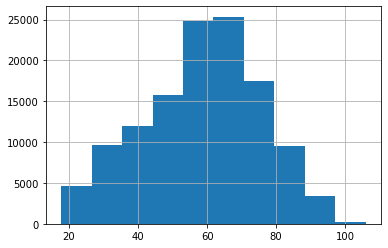

In [13]:
voter_file_df[voter_file_df['PARTY_AFFILIATION']=='R']['AGE'].hist()
voter_file_df[voter_file_df['PARTY_AFFILIATION']=='R']['AGE'].describe()


count    134591.000000
mean         53.316227
std          17.866931
min          17.750000
25%          37.916667
50%          54.833333
75%          67.250000
max         109.666667
Name: AGE, dtype: float64

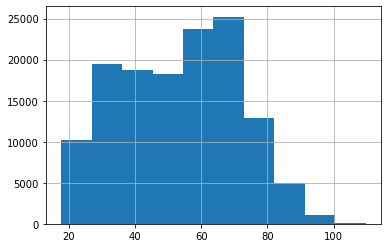

In [14]:
voter_file_df[voter_file_df['PARTY_AFFILIATION']=='D']['AGE'].hist()
voter_file_df[voter_file_df['PARTY_AFFILIATION']=='D']['AGE'].describe()


count    325868.000000
mean         42.173869
std          16.818981
min          17.750000
25%          28.666667
50%          38.166667
75%          53.916667
max         111.000000
Name: AGE, dtype: float64

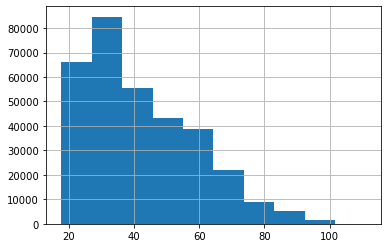

In [15]:
voter_file_df[voter_file_df['PARTY_AFFILIATION'].isna()]['AGE'].hist()
voter_file_df[voter_file_df['PARTY_AFFILIATION'].isna()]['AGE'].describe()


In [16]:
voter_file_df['STATE_REPRESENTATIVE_DISTRICT'].value_counts()

28    87691
32    87575
27    87446
33    81796
31    81232
29    79722
30    78827
Name: STATE_REPRESENTATIVE_DISTRICT, dtype: int64

In [17]:
voter_file_df['STATE_SENATE_DISTRICT'].value_counts()

9    250603
8    246240
7     87446
Name: STATE_SENATE_DISTRICT, dtype: int64

In [18]:
voter_file_df['CONGRESSIONAL_DISTRICT'].value_counts()

1    359402
2    224887
Name: CONGRESSIONAL_DISTRICT, dtype: int64

In [19]:
state_rep_counts = voter_file_df['STATE_REPRESENTATIVE_DISTRICT'].unique()
state_rep_counts

array([28, 33, 31, 29, 30, 27, 32], dtype=int64)

In [20]:
state_rep_dist_party_count = {}

for district in voter_file_df['STATE_REPRESENTATIVE_DISTRICT'].unique():
    state_rep_dist_party_count[district] = {'R': 0, 'D': 0, 'majority':0}

for district in voter_file_df['STATE_REPRESENTATIVE_DISTRICT'].unique():
    for party in state_rep_dist_party_count[district]:
        vf_test = voter_file_df[voter_file_df['STATE_REPRESENTATIVE_DISTRICT'] == district]
        vf_test = vf_test[vf_test['PARTY_AFFILIATION'] == party]
        
        state_rep_dist_party_count[district][party] = vf_test['PARTY_AFFILIATION'].count()         
    if state_rep_dist_party_count[district]['R'] - state_rep_dist_party_count[district]['D'] > 0:
        state_rep_dist_party_count[district]['majority'] = 'R'
    else:
        state_rep_dist_party_count[district]['majority'] = 'D'
state_rep_dist_party_count    

{28: {'R': 22505, 'D': 20835, 'majority': 'R'},
 33: {'R': 9186, 'D': 26219, 'majority': 'D'},
 31: {'R': 9545, 'D': 22926, 'majority': 'D'},
 29: {'R': 22959, 'D': 11283, 'majority': 'R'},
 30: {'R': 25085, 'D': 11275, 'majority': 'R'},
 27: {'R': 26773, 'D': 18968, 'majority': 'R'},
 32: {'R': 7012, 'D': 23085, 'majority': 'D'}}

In [21]:
''' from https://www.legislature.ohio.gov/legislators/house-directory, parties in power by district:

27: R
28: D
29: R
30: R
31: D
32: D
33: D

'''

current_rep_party = {   27: 'R',
                        28: 'D',
                        29: 'R',
                        30: 'R',
                        31: 'D',
                        32: 'D',
                        33: 'D' }

party_predicts = {}
for district in voter_file_df['STATE_REPRESENTATIVE_DISTRICT'].unique():
    if state_rep_dist_party_count[district]['majority'] == current_rep_party[district]:
        party_predicts[district] = True
    else:
        party_predicts[district] = False

party_predicts

{28: False, 33: True, 31: True, 29: True, 30: True, 27: True, 32: True}

In [81]:
#GENERAL-11/06/2018

7

In [22]:
voter_file_df.head()

,SOS_VOTERID,COUNTY_NUMBER,COUNTY_ID,LAST_NAME,FIRST_NAME,MIDDLE_NAME,SUFFIX,DATE_OF_BIRTH,REGISTRATION_DATE,VOTER_STATUS,PARTY_AFFILIATION,RESIDENTIAL_ADDRESS1,RESIDENTIAL_SECONDARY_ADDR,RESIDENTIAL_CITY,RESIDENTIAL_STATE,RESIDENTIAL_ZIP,RESIDENTIAL_ZIP_PLUS4,RESIDENTIAL_COUNTRY,RESIDENTIAL_POSTALCODE,MAILING_ADDRESS1,MAILING_SECONDARY_ADDRESS,MAILING_CITY,MAILING_STATE,MAILING_ZIP,MAILING_ZIP_PLUS4,MAILING_COUNTRY,MAILING_POSTAL_CODE,CAREER_CENTER,CITY,CITY_SCHOOL_DISTRICT,COUNTY_COURT_DISTRICT,CONGRESSIONAL_DISTRICT,COURT_OF_APPEALS,EDU_SERVICE_CENTER_DISTRICT,EXEMPTED_VILL_SCHOOL_DISTRICT,LIBRARY,LOCAL_SCHOOL_DISTRICT,MUNICIPAL_COURT_DISTRICT,PRECINCT_NAME,PRECINCT_CODE,STATE_BOARD_OF_EDUCATION,STATE_REPRESENTATIVE_DISTRICT,STATE_SENATE_DISTRICT,TOWNSHIP,VILLAGE,WARD,PRIMARY-03/07/2000,GENERAL-11/07/2000,SPECIAL-05/08/2001,GENERAL-11/06/2001,PRIMARY-05/07/2002,GENERAL-11/05/2002,SPECIAL-05/06/2003,GENERAL-11/04/2003,PRIMARY-03/02/2004,GENERAL-11/02/2004,SPECIAL-02/08/2005,PRIMARY-05/03/2005,PRIMARY-09/13/2005,GENERAL-11/08/2005,SPECIAL-02/07/2006,PRIMARY-05/02/2006,GENERAL-11/07/2006,PRIMARY-05/08/2007,PRIMARY-09/11/2007,GENERAL-11/06/2007,PRIMARY-11/06/2007,GENERAL-12/11/2007,PRIMARY-03/04/2008,PRIMARY-10/14/2008,GENERAL-11/04/2008,GENERAL-11/18/2008,PRIMARY-05/05/2009,PRIMARY-09/08/2009,PRIMARY-09/15/2009,PRIMARY-09/29/2009,GENERAL-11/03/2009,PRIMARY-05/04/2010,PRIMARY-07/13/2010,PRIMARY-09/07/2010,GENERAL-11/02/2010,PRIMARY-05/03/2011,PRIMARY-09/13/2011,GENERAL-11/08/2011,PRIMARY-03/06/2012,GENERAL-11/06/2012,PRIMARY-05/07/2013,PRIMARY-09/10/2013,PRIMARY-10/01/2013,GENERAL-11/05/2013,PRIMARY-05/06/2014,GENERAL-11/04/2014,PRIMARY-05/05/2015,PRIMARY-09/15/2015,GENERAL-11/03/2015,PRIMARY-03/15/2016,GENERAL-06/07/2016,PRIMARY-09/13/2016,GENERAL-11/08/2016,PRIMARY-05/02/2017,PRIMARY-09/12/2017,GENERAL-11/07/2017,PRIMARY-05/08/2018,GENERAL-08/07/2018,GENERAL-11/06/2018,PRIMARY-05/07/2019,PRIMARY-09/10/2019,GENERAL-11/05/2019,PRIMARY-03/17/2020,AGE
0,OH0022014172,31,1779225,MULLIGAN,KEVIN,NaN,NaN,1971-02-19,2012-09-21,ACTIVE,R,12 CARPENTERS RUN,NaN,CINCINNATI,OH,45241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,BLUE ASH CITY,SYCAMORE COMMUNITY CITY SD,NaN,2,1,NaN,NaN,NaN,NaN,HAMILTON-CO,BLUE ASH 5-A,31-AAM,4,28,8,NaN,NaN,BLUE ASH WARD 5,R,X,NaN,NaN,R,X,NaN,X,NaN,X,NaN,NaN,NaN,NaN,NaN,R,X,NaN,NaN,NaN,NaN,NaN,R,NaN,X,NaN,X,NaN,NaN,NaN,X,R,NaN,NaN,X,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,X,NaN,X,NaN,NaN,X,R,NaN,NaN,X,NaN,NaN,NaN,R,NaN,X,NaN,NaN,NaN,NaN,49.500000
1,OH0023897735,31,1922406,RITCHIE,JESSEKA,W,NaN,1995-12-11,2016-09-07,ACTIVE,NaN,1655 MUSKETEER DR,APT 316,CINCINNATI,OH,45207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CINCINNATI CITY,CINCINNATI PUBLIC SCHOOLS CITY SD,NaN,1,1,NaN,NaN,NaN,NaN,HAMILTON-CO,CINCINNATI 13-H,31-BQK,4,33,9,NaN,NaN,CINTI WARD 13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.666667
2,OH0023998054,31,1929806,NORMAN,MATTHEW,DAVID,NaN,1971-03-01,2016-10-01,ACTIVE,NaN,3705 WOODFORD RD,APT 10,CINCINNATI,OH,45213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CINCINNATI CITY,CINCINNATI PUBLIC SCHOOLS CITY SD,NaN,2,1,NaN,NaN,NaN,NaN,HAMILTON-CO,CINCINNATI 14-F,31-AIX,4,33,9,NaN,NaN,CINTI WARD 14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,49.416667
3,OH0014006346,31,1290671,WIGGINS,ELIZABETH,A,NaN,1970-01-30,1997-12-22,ACTIVE,NaN,1012 LIGORIO AVE,NaN,CINCINNATI,OH,45218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,NaN,WINTON WOODS CITY SD,NaN,2,1,NaN,NaN,NaN,NaN,HAMILTON-CO,GREENHILLS B,31-BGD,4,28,8,NaN,GREENHILLS VILLAGE,NaN,NaN,X,NaN,X,NaN,X,NaN,X

In [23]:
R_gen_election_voters = {}

R_df = voter_file_df[voter_file_df['PARTY_AFFILIATION'] == 'R']

for col in voter_file_df.columns:
    if col[:7] == 'GENERAL':
        R_gen_election_voters[col] = R_df[col].count()
        
R_gen_election_voters

{'GENERAL-11/07/2000': 80074,
 'GENERAL-11/06/2001': 48121,
 'GENERAL-11/05/2002': 65266,
 'GENERAL-11/04/2003': 47301,
 'GENERAL-11/02/2004': 93351,
 'GENERAL-11/08/2005': 57112,
 'GENERAL-11/07/2006': 81621,
 'GENERAL-11/06/2007': 61903,
 'GENERAL-12/11/2007': 28,
 'GENERAL-11/04/2008': 100901,
 'GENERAL-11/18/2008': 0,
 'GENERAL-11/03/2009': 78419,
 'GENERAL-11/02/2010': 88929,
 'GENERAL-11/08/2011': 82308,
 'GENERAL-11/06/2012': 108644,
 'GENERAL-11/05/2013': 60197,
 'GENERAL-11/04/2014': 88962,
 'GENERAL-11/03/2015': 86436,
 'GENERAL-06/07/2016': 31,
 'GENERAL-11/08/2016': 117023,
 'GENERAL-11/07/2017': 68665,
 'GENERAL-08/07/2018': 3,
 'GENERAL-11/06/2018': 106708,
 'GENERAL-11/05/2019': 65593}

In [24]:
D_gen_election_voters = {}

D_df = voter_file_df[voter_file_df['PARTY_AFFILIATION'] == 'D']

for col in voter_file_df.columns:
    if col[:7] == 'GENERAL':
        D_gen_election_voters[col] = D_df[col].count()
        
D_gen_election_voters

{'GENERAL-11/07/2000': 66533,
 'GENERAL-11/06/2001': 46090,
 'GENERAL-11/05/2002': 50883,
 'GENERAL-11/04/2003': 42664,
 'GENERAL-11/02/2004': 85317,
 'GENERAL-11/08/2005': 51222,
 'GENERAL-11/07/2006': 71011,
 'GENERAL-11/06/2007': 51084,
 'GENERAL-12/11/2007': 35,
 'GENERAL-11/04/2008': 98099,
 'GENERAL-11/18/2008': 0,
 'GENERAL-11/03/2009': 65742,
 'GENERAL-11/02/2010': 79833,
 'GENERAL-11/08/2011': 74168,
 'GENERAL-11/06/2012': 108013,
 'GENERAL-11/05/2013': 56028,
 'GENERAL-11/04/2014': 82300,
 'GENERAL-11/03/2015': 77764,
 'GENERAL-06/07/2016': 56,
 'GENERAL-11/08/2016': 121014,
 'GENERAL-11/07/2017': 75405,
 'GENERAL-08/07/2018': 34,
 'GENERAL-11/06/2018': 116102,
 'GENERAL-11/05/2019': 69694}

In [25]:
#unafilliated voters
U_gen_election_voters = {}

U_df = voter_file_df[voter_file_df['PARTY_AFFILIATION'].isna()]

for col in voter_file_df.columns:
    if col[:7] == 'GENERAL':
        U_gen_election_voters[col] = U_df[col].count()
        
U_gen_election_voters

{'GENERAL-11/07/2000': 60599,
 'GENERAL-11/06/2001': 28211,
 'GENERAL-11/05/2002': 33457,
 'GENERAL-11/04/2003': 23774,
 'GENERAL-11/02/2004': 98462,
 'GENERAL-11/08/2005': 30585,
 'GENERAL-11/07/2006': 56086,
 'GENERAL-11/06/2007': 30859,
 'GENERAL-12/11/2007': 17,
 'GENERAL-11/04/2008': 125348,
 'GENERAL-11/18/2008': 0,
 'GENERAL-11/03/2009': 48156,
 'GENERAL-11/02/2010': 63771,
 'GENERAL-11/08/2011': 52611,
 'GENERAL-11/06/2012': 144431,
 'GENERAL-11/05/2013': 27847,
 'GENERAL-11/04/2014': 47857,
 'GENERAL-11/03/2015': 45328,
 'GENERAL-06/07/2016': 67,
 'GENERAL-11/08/2016': 155617,
 'GENERAL-11/07/2017': 29836,
 'GENERAL-08/07/2018': 75,
 'GENERAL-11/06/2018': 113040,
 'GENERAL-11/05/2019': 32029}

In [26]:
from datetime import datetime
import matplotlib.pyplot as plt

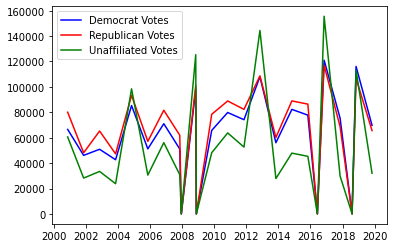

In [27]:
#plot number of republican voters vs democratic voters in previous general elections

D_list = []
R_list = []
U_list = []
date_list = []
for key in D_gen_election_voters:
    D_list.append(D_gen_election_voters[key])
    R_list.append(R_gen_election_voters[key])
    U_list.append(U_gen_election_voters[key])
    date_list.append(datetime.strptime(key.split('-')[1], "%m/%d/%Y"))

plt.plot(date_list, D_list, color='blue', label='Democrat Votes')
plt.plot(date_list, R_list, color='red', label='Republican Votes')
plt.plot(date_list, U_list, color='green', label='Unaffiliated Votes')

plt.legend()
plt.show()

In [28]:
#percentage of Republican, Democrats, and unaffiliated who voted in each general election for the last 20 years
R_gen_election_pct_voters = {}

R_df = voter_file_df[voter_file_df['PARTY_AFFILIATION'] == 'R']

for col in voter_file_df.columns:
    if col[:7] == 'GENERAL':
        R_gen_election_pct_voters[col] = R_df[col].count()/len(R_df[col])
        
R_gen_election_pct_voters

{'GENERAL-11/07/2000': 0.6506642831024255,
 'GENERAL-11/06/2001': 0.39102100515987487,
 'GENERAL-11/05/2002': 0.5303376264575631,
 'GENERAL-11/04/2003': 0.3843578596676553,
 'GENERAL-11/02/2004': 0.758550359566083,
 'GENERAL-11/08/2005': 0.46407995774590666,
 'GENERAL-11/07/2006': 0.6632348758786007,
 'GENERAL-11/06/2007': 0.5030106041522773,
 'GENERAL-12/11/2007': 0.00022752204119774104,
 'GENERAL-11/04/2008': 0.8199000528176167,
 'GENERAL-11/18/2008': 0.0,
 'GENERAL-11/03/2009': 0.6372161053102019,
 'GENERAL-11/02/2010': 0.7226181286312111,
 'GENERAL-11/08/2011': 0.668817291675131,
 'GENERAL-11/06/2012': 0.8828180229959778,
 'GENERAL-11/05/2013': 0.4891480112135863,
 'GENERAL-11/04/2014': 0.7228862796083371,
 'GENERAL-11/03/2015': 0.7023605411774265,
 'GENERAL-06/07/2016': 0.00025189940275464185,
 'GENERAL-11/08/2016': 0.9509039938244017,
 'GENERAL-11/07/2017': 0.5579571771015317,
 'GENERAL-08/07/2018': 2.4377361556900823e-05,
 'GENERAL-11/06/2018': 0.8670864990045911,
 'GENERAL-11/0

In [29]:
#percentage of Republican, Democrats, and unaffiliated who voted in each general election for the last 20 years
D_gen_election_pct_voters = {}

D_df = voter_file_df[voter_file_df['PARTY_AFFILIATION'] == 'D']

for col in voter_file_df.columns:
    if col[:7] == 'GENERAL':
        D_gen_election_pct_voters[col] = D_df[col].count()/len(D_df[col])
        
D_gen_election_pct_voters

{'GENERAL-11/07/2000': 0.4943346880549219,
 'GENERAL-11/06/2001': 0.34244488858839,
 'GENERAL-11/05/2002': 0.37805648223135274,
 'GENERAL-11/04/2003': 0.31698999190139016,
 'GENERAL-11/02/2004': 0.633898254712425,
 'GENERAL-11/08/2005': 0.3805752241977547,
 'GENERAL-11/07/2006': 0.5276058577468032,
 'GENERAL-11/06/2007': 0.37954989560966185,
 'GENERAL-12/11/2007': 0.00026004710567571385,
 'GENERAL-11/04/2008': 0.7288674577051958,
 'GENERAL-11/18/2008': 0.0,
 'GENERAL-11/03/2009': 0.48845762346665084,
 'GENERAL-11/02/2010': 0.5931525882116933,
 'GENERAL-11/08/2011': 0.5510621066787527,
 'GENERAL-11/06/2012': 0.802527657867168,
 'GENERAL-11/05/2013': 0.4162834067656827,
 'GENERAL-11/04/2014': 0.6114821942031785,
 'GENERAL-11/03/2015': 0.577780089307606,
 'GENERAL-06/07/2016': 0.00041607536908114213,
 'GENERAL-11/08/2016': 0.8991240127497381,
 'GENERAL-11/07/2017': 0.5602529143850629,
 'GENERAL-08/07/2018': 0.00025261718837069346,
 'GENERAL-11/06/2018': 0.862628258947478,
 'GENERAL-11/05/

In [30]:
U_gen_election_pct_voters = {}

U_df = voter_file_df[voter_file_df['PARTY_AFFILIATION'].isna()]

for col in voter_file_df.columns:
    if col[:7] == 'GENERAL':
        U_gen_election_pct_voters[col] = U_df[col].count()/len(U_df[col])
        
U_gen_election_pct_voters

{'GENERAL-11/07/2000': 0.1859618004836314,
 'GENERAL-11/06/2001': 0.08657186345391385,
 'GENERAL-11/05/2002': 0.10267040642223231,
 'GENERAL-11/04/2003': 0.07295592080228805,
 'GENERAL-11/02/2004': 0.30215301901383385,
 'GENERAL-11/08/2005': 0.09385702186161268,
 'GENERAL-11/07/2006': 0.17211263456368836,
 'GENERAL-11/06/2007': 0.09469785311844059,
 'GENERAL-12/11/2007': 5.216836264990732e-05,
 'GENERAL-11/04/2008': 0.3846588189082696,
 'GENERAL-11/18/2008': 0.0,
 'GENERAL-11/03/2009': 0.14777762775111394,
 'GENERAL-11/02/2010': 0.19569580320866117,
 'GENERAL-11/08/2011': 0.16144880749260437,
 'GENERAL-11/06/2012': 0.4432193403463979,
 'GENERAL-11/05/2013': 0.0854548467477629,
 'GENERAL-11/04/2014': 0.1468600783139185,
 'GENERAL-11/03/2015': 0.13909926718794113,
 'GENERAL-06/07/2016': 0.00020560472338492885,
 'GENERAL-11/08/2016': 0.47754612297003696,
 'GENERAL-11/07/2017': 0.09155854517780206,
 'GENERAL-08/07/2018': 0.00023015454110253232,
 'GENERAL-11/06/2018': 0.3468889243497367,
 '

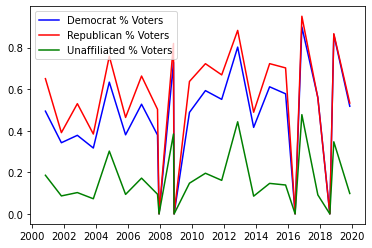

In [31]:
D_list = []
R_list = []
U_list = []
date_list = []

for key in U_gen_election_pct_voters:
    D_list.append(D_gen_election_pct_voters[key])
    R_list.append(R_gen_election_pct_voters[key])
    U_list.append(U_gen_election_pct_voters[key])
    date_list.append(datetime.strptime(key.split('-')[1], "%m/%d/%Y"))

plt.plot(date_list, D_list, color='blue', label='Democrat % Voters')
plt.plot(date_list, R_list, color='red', label='Republican % Voters')
plt.plot(date_list, U_list, color='green', label='Unaffiliated % Voters')

plt.legend()
plt.show()

In [32]:
import gender_guesser.detector as gender

In [33]:
d = gender.Detector(case_sensitive=False)
d.get_gender("KEVIN")

'male'

In [34]:
for index, row in voter_file_df.iterrows():
    voter_file_df.loc[index, 'GENDER'] = d.get_gender(row['FIRST_NAME'])

In [35]:
voter_file_df['GENDER'].count()

584289

In [36]:
voter_file_df.head()

,SOS_VOTERID,COUNTY_NUMBER,COUNTY_ID,LAST_NAME,FIRST_NAME,MIDDLE_NAME,SUFFIX,DATE_OF_BIRTH,REGISTRATION_DATE,VOTER_STATUS,PARTY_AFFILIATION,RESIDENTIAL_ADDRESS1,RESIDENTIAL_SECONDARY_ADDR,RESIDENTIAL_CITY,RESIDENTIAL_STATE,RESIDENTIAL_ZIP,RESIDENTIAL_ZIP_PLUS4,RESIDENTIAL_COUNTRY,RESIDENTIAL_POSTALCODE,MAILING_ADDRESS1,MAILING_SECONDARY_ADDRESS,MAILING_CITY,MAILING_STATE,MAILING_ZIP,MAILING_ZIP_PLUS4,MAILING_COUNTRY,MAILING_POSTAL_CODE,CAREER_CENTER,CITY,CITY_SCHOOL_DISTRICT,COUNTY_COURT_DISTRICT,CONGRESSIONAL_DISTRICT,COURT_OF_APPEALS,EDU_SERVICE_CENTER_DISTRICT,EXEMPTED_VILL_SCHOOL_DISTRICT,LIBRARY,LOCAL_SCHOOL_DISTRICT,MUNICIPAL_COURT_DISTRICT,PRECINCT_NAME,PRECINCT_CODE,STATE_BOARD_OF_EDUCATION,STATE_REPRESENTATIVE_DISTRICT,STATE_SENATE_DISTRICT,TOWNSHIP,VILLAGE,WARD,PRIMARY-03/07/2000,GENERAL-11/07/2000,SPECIAL-05/08/2001,GENERAL-11/06/2001,PRIMARY-05/07/2002,GENERAL-11/05/2002,SPECIAL-05/06/2003,GENERAL-11/04/2003,PRIMARY-03/02/2004,GENERAL-11/02/2004,SPECIAL-02/08/2005,PRIMARY-05/03/2005,PRIMARY-09/13/2005,GENERAL-11/08/2005,SPECIAL-02/07/2006,PRIMARY-05/02/2006,GENERAL-11/07/2006,PRIMARY-05/08/2007,PRIMARY-09/11/2007,GENERAL-11/06/2007,PRIMARY-11/06/2007,GENERAL-12/11/2007,PRIMARY-03/04/2008,PRIMARY-10/14/2008,GENERAL-11/04/2008,GENERAL-11/18/2008,PRIMARY-05/05/2009,PRIMARY-09/08/2009,PRIMARY-09/15/2009,PRIMARY-09/29/2009,GENERAL-11/03/2009,PRIMARY-05/04/2010,PRIMARY-07/13/2010,PRIMARY-09/07/2010,GENERAL-11/02/2010,PRIMARY-05/03/2011,PRIMARY-09/13/2011,GENERAL-11/08/2011,PRIMARY-03/06/2012,GENERAL-11/06/2012,PRIMARY-05/07/2013,PRIMARY-09/10/2013,PRIMARY-10/01/2013,GENERAL-11/05/2013,PRIMARY-05/06/2014,GENERAL-11/04/2014,PRIMARY-05/05/2015,PRIMARY-09/15/2015,GENERAL-11/03/2015,PRIMARY-03/15/2016,GENERAL-06/07/2016,PRIMARY-09/13/2016,GENERAL-11/08/2016,PRIMARY-05/02/2017,PRIMARY-09/12/2017,GENERAL-11/07/2017,PRIMARY-05/08/2018,GENERAL-08/07/2018,GENERAL-11/06/2018,PRIMARY-05/07/2019,PRIMARY-09/10/2019,GENERAL-11/05/2019,PRIMARY-03/17/2020,AGE,GENDER
0,OH0022014172,31,1779225,MULLIGAN,KEVIN,NaN,NaN,1971-02-19,2012-09-21,ACTIVE,R,12 CARPENTERS RUN,NaN,CINCINNATI,OH,45241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,BLUE ASH CITY,SYCAMORE COMMUNITY CITY SD,NaN,2,1,NaN,NaN,NaN,NaN,HAMILTON-CO,BLUE ASH 5-A,31-AAM,4,28,8,NaN,NaN,BLUE ASH WARD 5,R,X,NaN,NaN,R,X,NaN,X,NaN,X,NaN,NaN,NaN,NaN,NaN,R,X,NaN,NaN,NaN,NaN,NaN,R,NaN,X,NaN,X,NaN,NaN,NaN,X,R,NaN,NaN,X,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,X,NaN,X,NaN,NaN,X,R,NaN,NaN,X,NaN,NaN,NaN,R,NaN,X,NaN,NaN,NaN,NaN,49.500000,male
1,OH0023897735,31,1922406,RITCHIE,JESSEKA,W,NaN,1995-12-11,2016-09-07,ACTIVE,NaN,1655 MUSKETEER DR,APT 316,CINCINNATI,OH,45207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CINCINNATI CITY,CINCINNATI PUBLIC SCHOOLS CITY SD,NaN,1,1,NaN,NaN,NaN,NaN,HAMILTON-CO,CINCINNATI 13-H,31-BQK,4,33,9,NaN,NaN,CINTI WARD 13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.666667,unknown
2,OH0023998054,31,1929806,NORMAN,MATTHEW,DAVID,NaN,1971-03-01,2016-10-01,ACTIVE,NaN,3705 WOODFORD RD,APT 10,CINCINNATI,OH,45213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CINCINNATI CITY,CINCINNATI PUBLIC SCHOOLS CITY SD,NaN,2,1,NaN,NaN,NaN,NaN,HAMILTON-CO,CINCINNATI 14-F,31-AIX,4,33,9,NaN,NaN,CINTI WARD 14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,49.416667,male
3,OH0014006346,31,1290671,WIGGINS,ELIZABETH,A,NaN,1970-01-30,1997-12-22,ACTIVE,NaN,1012 LIGORIO AVE,NaN,CINCINNATI,OH,45218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,NaN,WINTON WOODS CITY SD,NaN,2,1,NaN,NaN,NaN,NaN,HAMILTON-CO,GREENHILLS B,31-BGD,4,28,8,NaN,GREENHILLS VILLAGE,Na

###The gender lookup takes a long time.  I saved the dataframe to a csv so I could pick up here next time.  

In [37]:
#voter_file_df.to_csv(r"Path\to\file\Hamilton County with Gender.csv", index=False)

In [38]:
reg_date_lst = []

for index, row in voter_file_df.iterrows():
    reg_date_lst.append(datetime.strptime(row['REGISTRATION_DATE'], "%Y-%m-%d"))
    
voter_file_df['REGISTRATION_DATE_OBJ'] = reg_date_lst

In [39]:
voter_file_df.head()

,SOS_VOTERID,COUNTY_NUMBER,COUNTY_ID,LAST_NAME,FIRST_NAME,MIDDLE_NAME,SUFFIX,DATE_OF_BIRTH,REGISTRATION_DATE,VOTER_STATUS,PARTY_AFFILIATION,RESIDENTIAL_ADDRESS1,RESIDENTIAL_SECONDARY_ADDR,RESIDENTIAL_CITY,RESIDENTIAL_STATE,RESIDENTIAL_ZIP,RESIDENTIAL_ZIP_PLUS4,RESIDENTIAL_COUNTRY,RESIDENTIAL_POSTALCODE,MAILING_ADDRESS1,MAILING_SECONDARY_ADDRESS,MAILING_CITY,MAILING_STATE,MAILING_ZIP,MAILING_ZIP_PLUS4,MAILING_COUNTRY,MAILING_POSTAL_CODE,CAREER_CENTER,CITY,CITY_SCHOOL_DISTRICT,COUNTY_COURT_DISTRICT,CONGRESSIONAL_DISTRICT,COURT_OF_APPEALS,EDU_SERVICE_CENTER_DISTRICT,EXEMPTED_VILL_SCHOOL_DISTRICT,LIBRARY,LOCAL_SCHOOL_DISTRICT,MUNICIPAL_COURT_DISTRICT,PRECINCT_NAME,PRECINCT_CODE,STATE_BOARD_OF_EDUCATION,STATE_REPRESENTATIVE_DISTRICT,STATE_SENATE_DISTRICT,TOWNSHIP,VILLAGE,WARD,PRIMARY-03/07/2000,GENERAL-11/07/2000,SPECIAL-05/08/2001,GENERAL-11/06/2001,PRIMARY-05/07/2002,GENERAL-11/05/2002,SPECIAL-05/06/2003,GENERAL-11/04/2003,PRIMARY-03/02/2004,GENERAL-11/02/2004,SPECIAL-02/08/2005,PRIMARY-05/03/2005,PRIMARY-09/13/2005,GENERAL-11/08/2005,SPECIAL-02/07/2006,PRIMARY-05/02/2006,GENERAL-11/07/2006,PRIMARY-05/08/2007,PRIMARY-09/11/2007,GENERAL-11/06/2007,PRIMARY-11/06/2007,GENERAL-12/11/2007,PRIMARY-03/04/2008,PRIMARY-10/14/2008,GENERAL-11/04/2008,GENERAL-11/18/2008,PRIMARY-05/05/2009,PRIMARY-09/08/2009,PRIMARY-09/15/2009,PRIMARY-09/29/2009,GENERAL-11/03/2009,PRIMARY-05/04/2010,PRIMARY-07/13/2010,PRIMARY-09/07/2010,GENERAL-11/02/2010,PRIMARY-05/03/2011,PRIMARY-09/13/2011,GENERAL-11/08/2011,PRIMARY-03/06/2012,GENERAL-11/06/2012,PRIMARY-05/07/2013,PRIMARY-09/10/2013,PRIMARY-10/01/2013,GENERAL-11/05/2013,PRIMARY-05/06/2014,GENERAL-11/04/2014,PRIMARY-05/05/2015,PRIMARY-09/15/2015,GENERAL-11/03/2015,PRIMARY-03/15/2016,GENERAL-06/07/2016,PRIMARY-09/13/2016,GENERAL-11/08/2016,PRIMARY-05/02/2017,PRIMARY-09/12/2017,GENERAL-11/07/2017,PRIMARY-05/08/2018,GENERAL-08/07/2018,GENERAL-11/06/2018,PRIMARY-05/07/2019,PRIMARY-09/10/2019,GENERAL-11/05/2019,PRIMARY-03/17/2020,AGE,GENDER,REGISTRATION_DATE_OBJ
0,OH0022014172,31,1779225,MULLIGAN,KEVIN,NaN,NaN,1971-02-19,2012-09-21,ACTIVE,R,12 CARPENTERS RUN,NaN,CINCINNATI,OH,45241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,BLUE ASH CITY,SYCAMORE COMMUNITY CITY SD,NaN,2,1,NaN,NaN,NaN,NaN,HAMILTON-CO,BLUE ASH 5-A,31-AAM,4,28,8,NaN,NaN,BLUE ASH WARD 5,R,X,NaN,NaN,R,X,NaN,X,NaN,X,NaN,NaN,NaN,NaN,NaN,R,X,NaN,NaN,NaN,NaN,NaN,R,NaN,X,NaN,X,NaN,NaN,NaN,X,R,NaN,NaN,X,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,X,NaN,X,NaN,NaN,X,R,NaN,NaN,X,NaN,NaN,NaN,R,NaN,X,NaN,NaN,NaN,NaN,49.500000,male,2012-09-21
1,OH0023897735,31,1922406,RITCHIE,JESSEKA,W,NaN,1995-12-11,2016-09-07,ACTIVE,NaN,1655 MUSKETEER DR,APT 316,CINCINNATI,OH,45207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CINCINNATI CITY,CINCINNATI PUBLIC SCHOOLS CITY SD,NaN,1,1,NaN,NaN,NaN,NaN,HAMILTON-CO,CINCINNATI 13-H,31-BQK,4,33,9,NaN,NaN,CINTI WARD 13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.666667,unknown,2016-09-07
2,OH0023998054,31,1929806,NORMAN,MATTHEW,DAVID,NaN,1971-03-01,2016-10-01,ACTIVE,NaN,3705 WOODFORD RD,APT 10,CINCINNATI,OH,45213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CINCINNATI CITY,CINCINNATI PUBLIC SCHOOLS CITY SD,NaN,2,1,NaN,NaN,NaN,NaN,HAMILTON-CO,CINCINNATI 14-F,31-AIX,4,33,9,NaN,NaN,CINTI WARD 14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,49.416667,male,2016-10-01
3,OH0014006346,31,1290671,WIGGINS,ELIZABETH,A,NaN,1970-01-30,1997-12-22,ACTIVE,NaN,1012 LIGORIO AVE,NaN,CINCINNATI,OH,45218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,NaN,WINTON WOODS CITY SD,NaN,2,1,NaN,NaN,NaN,NaN,HAMILTON-

In [41]:
voter_file_df['REGISTRATION_DATE_OBJ'][10]

Timestamp('1989-07-17 00:00:00')

In [42]:
datetime(2012,3,5) > voter_file_df['REGISTRATION_DATE_OBJ'][3]

True

In [43]:
datetime(2012,3,5).day

5

In [44]:
#https://www.r-bloggers.com/voter-targeting-with-r/
#2016 "last four" score - did you vote in the 2014 primary, 2014 general, 2012 primary, and 2012 general?

full_last_four_df = voter_file_df[voter_file_df['REGISTRATION_DATE_OBJ'] < datetime(2012, 3, 6)]

last_four_lst = ["PRIMARY-03/06/2012", "GENERAL-11/06/2012", "PRIMARY-05/06/2014", "GENERAL-11/04/2014"]

for index, row in full_last_four_df.iterrows():
    last_four_score = 0
    for election in last_four_lst:
        if pd.notna(row[election]):
            last_four_score += 1
    full_last_four_df.loc[index, "2016_LAST_FOUR"] = float(last_four_score/len(last_four_lst))


C:\Users\kevin\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kevin\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [45]:
len(full_last_four_df)

354621

In [46]:
full_last_four_df['GENDER'].value_counts()

female           153408
male             145566
unknown           25431
mostly_female     21058
mostly_male        7449
andy               1709
Name: GENDER, dtype: int64

In [47]:
for index, row in full_last_four_df.iterrows():
    if row['GENDER'] == 'mostly_female':
        full_last_four_df.loc[index, 'GENDER'] = 'female'
    elif row['GENDER'] == 'mostly_male':
        full_last_four_df.loc[index, 'GENDER'] = 'male'

In [48]:
full_last_four_df['GENDER'].value_counts()

female     174466
male       153015
unknown     25431
andy         1709
Name: GENDER, dtype: int64

In [230]:
full_last_four_df.head()

,SOS_VOTERID,COUNTY_NUMBER,COUNTY_ID,LAST_NAME,FIRST_NAME,MIDDLE_NAME,SUFFIX,DATE_OF_BIRTH,REGISTRATION_DATE,VOTER_STATUS,PARTY_AFFILIATION,RESIDENTIAL_ADDRESS1,RESIDENTIAL_SECONDARY_ADDR,RESIDENTIAL_CITY,RESIDENTIAL_STATE,RESIDENTIAL_ZIP,RESIDENTIAL_ZIP_PLUS4,RESIDENTIAL_COUNTRY,RESIDENTIAL_POSTALCODE,MAILING_ADDRESS1,MAILING_SECONDARY_ADDRESS,MAILING_CITY,MAILING_STATE,MAILING_ZIP,MAILING_ZIP_PLUS4,MAILING_COUNTRY,MAILING_POSTAL_CODE,CAREER_CENTER,CITY,CITY_SCHOOL_DISTRICT,COUNTY_COURT_DISTRICT,CONGRESSIONAL_DISTRICT,COURT_OF_APPEALS,EDU_SERVICE_CENTER_DISTRICT,EXEMPTED_VILL_SCHOOL_DISTRICT,LIBRARY,LOCAL_SCHOOL_DISTRICT,MUNICIPAL_COURT_DISTRICT,PRECINCT_NAME,PRECINCT_CODE,STATE_BOARD_OF_EDUCATION,STATE_REPRESENTATIVE_DISTRICT,STATE_SENATE_DISTRICT,TOWNSHIP,VILLAGE,WARD,PRIMARY-03/07/2000,GENERAL-11/07/2000,SPECIAL-05/08/2001,GENERAL-11/06/2001,PRIMARY-05/07/2002,GENERAL-11/05/2002,SPECIAL-05/06/2003,GENERAL-11/04/2003,PRIMARY-03/02/2004,GENERAL-11/02/2004,SPECIAL-02/08/2005,PRIMARY-05/03/2005,PRIMARY-09/13/2005,GENERAL-11/08/2005,SPECIAL-02/07/2006,PRIMARY-05/02/2006,GENERAL-11/07/2006,PRIMARY-05/08/2007,PRIMARY-09/11/2007,GENERAL-11/06/2007,PRIMARY-11/06/2007,GENERAL-12/11/2007,PRIMARY-03/04/2008,PRIMARY-10/14/2008,GENERAL-11/04/2008,GENERAL-11/18/2008,PRIMARY-05/05/2009,PRIMARY-09/08/2009,PRIMARY-09/15/2009,PRIMARY-09/29/2009,GENERAL-11/03/2009,PRIMARY-05/04/2010,PRIMARY-07/13/2010,PRIMARY-09/07/2010,GENERAL-11/02/2010,PRIMARY-05/03/2011,PRIMARY-09/13/2011,GENERAL-11/08/2011,PRIMARY-03/06/2012,GENERAL-11/06/2012,PRIMARY-05/07/2013,PRIMARY-09/10/2013,PRIMARY-10/01/2013,GENERAL-11/05/2013,PRIMARY-05/06/2014,GENERAL-11/04/2014,PRIMARY-05/05/2015,PRIMARY-09/15/2015,GENERAL-11/03/2015,PRIMARY-03/15/2016,GENERAL-06/07/2016,PRIMARY-09/13/2016,GENERAL-11/08/2016,PRIMARY-05/02/2017,PRIMARY-09/12/2017,GENERAL-11/07/2017,PRIMARY-05/08/2018,GENERAL-08/07/2018,GENERAL-11/06/2018,PRIMARY-05/07/2019,PRIMARY-09/10/2019,GENERAL-11/05/2019,PRIMARY-03/17/2020,AGE,GENDER,REGISTRATION_DATE_OBJ,2016_LAST_FOUR
3,OH0014006346,31,1290671,WIGGINS,ELIZABETH,A,NaN,1970-01-30,1997-12-22,ACTIVE,NaN,1012 LIGORIO AVE,NaN,CINCINNATI,OH,45218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,NaN,WINTON WOODS CITY SD,NaN,2,1,NaN,NaN,NaN,NaN,HAMILTON-CO,GREENHILLS B,31-BGD,4,28,8,NaN,GREENHILLS VILLAGE,NaN,NaN,X,NaN,X,NaN,X,NaN,X,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,X,NaN,X,NaN,X,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,50.583333,female,1997-12-22,0.25
4,OH0013794451,31,1009838,NIES,TONY,LOUIS,NaN,1964-12-15,1989-10-16,CONFIRMATION,NaN,4317 GREENLEE AVE,NaN,CINCINNATI,OH,45217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,NaN,ST BERNARD-ELMWOOD PLACE CITY SD,NaN,1,1,NaN,NaN,NaN,NaN,HAMILTON-CO,ST BERNARD 3-A,31-AWP,4,31,9,NaN,NaN,ST. BERNARD WARD 3,NaN,X,NaN,X,NaN,NaN,NaN,X,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,R,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.666667,male,1989-10-16,0.25
5,OH0013725854,31,780494,CAIRNS,CAROLYN,J,NaN,1952-06-18,1989-07-17,ACTIVE,R,413 ELAINE DR,NaN,HARRISON,OH,45030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,HARRISON CITY,NaN,NaN,1,1,HAMILTON COUNTY ESC,NaN,NaN,SOUTHWEST LOCAL SD (HAMILTON),HAMILTON-CO,HARRISON A,31-BJE,4,29,8,HARRISON TWP.,NaN,NaN,NaN,X,NaN,X,NaN,X,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,R,X,NaN,NaN,X,NaN,NaN,R,NaN,X,NaN,NaN,NaN,NaN,NaN,X,R,NaN,NaN,X,R,NaN,X,NaN,X,NaN,NaN,NaN,X,NaN,X,R,NaN,X,R,NaN,NaN,X,R,NaN,X,R,NaN,X,NaN,NaN,X,R,68.166667,female,1989-07-17,0.50
6,OH0013755355,31,698836,LABOWSKY,CHRISTINE,NaN,NaN,1949-04-10,1989-07-17,ACTIVE,R,11745 LAURELVIEW DR,NaN,CINCINNATI,OH,45249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,MONTGOMERY CITY,SYCAMORE COMMUNITY CITY SD,NaN,1,1,NaN,NaN

In [233]:
full_last_four_df.drop(full_last_four_df[(full_last_four_df['GENDER'] == 'unknown') | (full_last_four_df['GENDER'] == 'andy')].index, inplace=True)

C:\Users\kevin\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
full_last_four_df['GENDER'].value_counts()

female     174466
male       153015
unknown     25431
andy         1709
Name: GENDER, dtype: int64

In [51]:
full_last_four_df = full_last_four_df.drop(full_last_four_df[(full_last_four_df['GENDER'] == 'andy') | (full_last_four_df['GENDER'] == 'unknown')].index)
full_last_four_df['GENDER'].value_counts()

female    174466
male      153015
Name: GENDER, dtype: int64

In [52]:
gender_dummy_df = pd.get_dummies(full_last_four_df['GENDER'])
gender_dummy_df.head()

,female,male
3,1,0
4,0,1
5,1,0
6,1,0
7,1,0


In [53]:
full_last_four_df = pd.concat([full_last_four_df, gender_dummy_df], axis = 1)
full_last_four_df.head()

,SOS_VOTERID,COUNTY_NUMBER,COUNTY_ID,LAST_NAME,FIRST_NAME,MIDDLE_NAME,SUFFIX,DATE_OF_BIRTH,REGISTRATION_DATE,VOTER_STATUS,PARTY_AFFILIATION,RESIDENTIAL_ADDRESS1,RESIDENTIAL_SECONDARY_ADDR,RESIDENTIAL_CITY,RESIDENTIAL_STATE,RESIDENTIAL_ZIP,RESIDENTIAL_ZIP_PLUS4,RESIDENTIAL_COUNTRY,RESIDENTIAL_POSTALCODE,MAILING_ADDRESS1,MAILING_SECONDARY_ADDRESS,MAILING_CITY,MAILING_STATE,MAILING_ZIP,MAILING_ZIP_PLUS4,MAILING_COUNTRY,MAILING_POSTAL_CODE,CAREER_CENTER,CITY,CITY_SCHOOL_DISTRICT,COUNTY_COURT_DISTRICT,CONGRESSIONAL_DISTRICT,COURT_OF_APPEALS,EDU_SERVICE_CENTER_DISTRICT,EXEMPTED_VILL_SCHOOL_DISTRICT,LIBRARY,LOCAL_SCHOOL_DISTRICT,MUNICIPAL_COURT_DISTRICT,PRECINCT_NAME,PRECINCT_CODE,STATE_BOARD_OF_EDUCATION,STATE_REPRESENTATIVE_DISTRICT,STATE_SENATE_DISTRICT,TOWNSHIP,VILLAGE,WARD,PRIMARY-03/07/2000,GENERAL-11/07/2000,SPECIAL-05/08/2001,GENERAL-11/06/2001,PRIMARY-05/07/2002,GENERAL-11/05/2002,SPECIAL-05/06/2003,GENERAL-11/04/2003,PRIMARY-03/02/2004,GENERAL-11/02/2004,SPECIAL-02/08/2005,PRIMARY-05/03/2005,PRIMARY-09/13/2005,GENERAL-11/08/2005,SPECIAL-02/07/2006,PRIMARY-05/02/2006,GENERAL-11/07/2006,PRIMARY-05/08/2007,PRIMARY-09/11/2007,GENERAL-11/06/2007,PRIMARY-11/06/2007,GENERAL-12/11/2007,PRIMARY-03/04/2008,PRIMARY-10/14/2008,GENERAL-11/04/2008,GENERAL-11/18/2008,PRIMARY-05/05/2009,PRIMARY-09/08/2009,PRIMARY-09/15/2009,PRIMARY-09/29/2009,GENERAL-11/03/2009,PRIMARY-05/04/2010,PRIMARY-07/13/2010,PRIMARY-09/07/2010,GENERAL-11/02/2010,PRIMARY-05/03/2011,PRIMARY-09/13/2011,GENERAL-11/08/2011,PRIMARY-03/06/2012,GENERAL-11/06/2012,PRIMARY-05/07/2013,PRIMARY-09/10/2013,PRIMARY-10/01/2013,GENERAL-11/05/2013,PRIMARY-05/06/2014,GENERAL-11/04/2014,PRIMARY-05/05/2015,PRIMARY-09/15/2015,GENERAL-11/03/2015,PRIMARY-03/15/2016,GENERAL-06/07/2016,PRIMARY-09/13/2016,GENERAL-11/08/2016,PRIMARY-05/02/2017,PRIMARY-09/12/2017,GENERAL-11/07/2017,PRIMARY-05/08/2018,GENERAL-08/07/2018,GENERAL-11/06/2018,PRIMARY-05/07/2019,PRIMARY-09/10/2019,GENERAL-11/05/2019,PRIMARY-03/17/2020,AGE,GENDER,REGISTRATION_DATE_OBJ,2016_LAST_FOUR,female,male
3,OH0014006346,31,1290671,WIGGINS,ELIZABETH,A,NaN,1970-01-30,1997-12-22,ACTIVE,NaN,1012 LIGORIO AVE,NaN,CINCINNATI,OH,45218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,NaN,WINTON WOODS CITY SD,NaN,2,1,NaN,NaN,NaN,NaN,HAMILTON-CO,GREENHILLS B,31-BGD,4,28,8,NaN,GREENHILLS VILLAGE,NaN,NaN,X,NaN,X,NaN,X,NaN,X,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,X,NaN,X,NaN,X,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,50.583333,female,1997-12-22,0.25,1,0
4,OH0013794451,31,1009838,NIES,TONY,LOUIS,NaN,1964-12-15,1989-10-16,CONFIRMATION,NaN,4317 GREENLEE AVE,NaN,CINCINNATI,OH,45217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,NaN,ST BERNARD-ELMWOOD PLACE CITY SD,NaN,1,1,NaN,NaN,NaN,NaN,HAMILTON-CO,ST BERNARD 3-A,31-AWP,4,31,9,NaN,NaN,ST. BERNARD WARD 3,NaN,X,NaN,X,NaN,NaN,NaN,X,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,R,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.666667,male,1989-10-16,0.25,0,1
5,OH0013725854,31,780494,CAIRNS,CAROLYN,J,NaN,1952-06-18,1989-07-17,ACTIVE,R,413 ELAINE DR,NaN,HARRISON,OH,45030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,HARRISON CITY,NaN,NaN,1,1,HAMILTON COUNTY ESC,NaN,NaN,SOUTHWEST LOCAL SD (HAMILTON),HAMILTON-CO,HARRISON A,31-BJE,4,29,8,HARRISON TWP.,NaN,NaN,NaN,X,NaN,X,NaN,X,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,R,X,NaN,NaN,X,NaN,NaN,R,NaN,X,NaN,NaN,NaN,NaN,NaN,X,R,NaN,NaN,X,R,NaN,X,NaN,X,NaN,NaN,NaN,X,NaN,X,R,NaN,X,R,NaN,NaN,X,R,NaN,X,R,NaN,X,NaN,NaN,X,R,68.166667,female,1989-07-17,0.50,1,0
6,OH0013755355,31,698836,LABOWSKY,CHRISTINE,NaN,NaN,1949-04-10,1989-07-17,ACTIVE,R,11745 LAURELVIEW DR,NaN,CINCINNATI,OH,45249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,MONTGOMERY CITY,SYCAMORE COMMUNITY

In [54]:
full_last_four_df['PARTY_AFFILIATION'].value_counts()

R    100847
D     92168
G       455
L        86
Name: PARTY_AFFILIATION, dtype: int64

In [55]:
full_last_four_df = full_last_four_df.drop(full_last_four_df[(full_last_four_df['PARTY_AFFILIATION'] == 'G') | (full_last_four_df['PARTY_AFFILIATION'] == 'L')].index)

In [56]:
full_last_four_df['PARTY_AFFILIATION'].value_counts()

R    100847
D     92168
Name: PARTY_AFFILIATION, dtype: int64

In [57]:
dummy_party_df = pd.get_dummies(full_last_four_df['PARTY_AFFILIATION'])

In [58]:
dummy_party_df.head()

,D,R
3,0,0
4,0,0
5,0,1
6,0,1
7,0,1


In [59]:
full_last_four_df = pd.concat([full_last_four_df, dummy_party_df], axis = 1)
full_last_four_df.head()

,SOS_VOTERID,COUNTY_NUMBER,COUNTY_ID,LAST_NAME,FIRST_NAME,MIDDLE_NAME,SUFFIX,DATE_OF_BIRTH,REGISTRATION_DATE,VOTER_STATUS,PARTY_AFFILIATION,RESIDENTIAL_ADDRESS1,RESIDENTIAL_SECONDARY_ADDR,RESIDENTIAL_CITY,RESIDENTIAL_STATE,RESIDENTIAL_ZIP,RESIDENTIAL_ZIP_PLUS4,RESIDENTIAL_COUNTRY,RESIDENTIAL_POSTALCODE,MAILING_ADDRESS1,MAILING_SECONDARY_ADDRESS,MAILING_CITY,MAILING_STATE,MAILING_ZIP,MAILING_ZIP_PLUS4,MAILING_COUNTRY,MAILING_POSTAL_CODE,CAREER_CENTER,CITY,CITY_SCHOOL_DISTRICT,COUNTY_COURT_DISTRICT,CONGRESSIONAL_DISTRICT,COURT_OF_APPEALS,EDU_SERVICE_CENTER_DISTRICT,EXEMPTED_VILL_SCHOOL_DISTRICT,LIBRARY,LOCAL_SCHOOL_DISTRICT,MUNICIPAL_COURT_DISTRICT,PRECINCT_NAME,PRECINCT_CODE,STATE_BOARD_OF_EDUCATION,STATE_REPRESENTATIVE_DISTRICT,STATE_SENATE_DISTRICT,TOWNSHIP,VILLAGE,WARD,PRIMARY-03/07/2000,GENERAL-11/07/2000,SPECIAL-05/08/2001,GENERAL-11/06/2001,PRIMARY-05/07/2002,GENERAL-11/05/2002,SPECIAL-05/06/2003,GENERAL-11/04/2003,PRIMARY-03/02/2004,GENERAL-11/02/2004,SPECIAL-02/08/2005,PRIMARY-05/03/2005,PRIMARY-09/13/2005,GENERAL-11/08/2005,SPECIAL-02/07/2006,PRIMARY-05/02/2006,GENERAL-11/07/2006,PRIMARY-05/08/2007,PRIMARY-09/11/2007,GENERAL-11/06/2007,PRIMARY-11/06/2007,GENERAL-12/11/2007,PRIMARY-03/04/2008,PRIMARY-10/14/2008,GENERAL-11/04/2008,GENERAL-11/18/2008,PRIMARY-05/05/2009,PRIMARY-09/08/2009,PRIMARY-09/15/2009,PRIMARY-09/29/2009,GENERAL-11/03/2009,PRIMARY-05/04/2010,PRIMARY-07/13/2010,PRIMARY-09/07/2010,GENERAL-11/02/2010,PRIMARY-05/03/2011,PRIMARY-09/13/2011,GENERAL-11/08/2011,PRIMARY-03/06/2012,GENERAL-11/06/2012,PRIMARY-05/07/2013,PRIMARY-09/10/2013,PRIMARY-10/01/2013,GENERAL-11/05/2013,PRIMARY-05/06/2014,GENERAL-11/04/2014,PRIMARY-05/05/2015,PRIMARY-09/15/2015,GENERAL-11/03/2015,PRIMARY-03/15/2016,GENERAL-06/07/2016,PRIMARY-09/13/2016,GENERAL-11/08/2016,PRIMARY-05/02/2017,PRIMARY-09/12/2017,GENERAL-11/07/2017,PRIMARY-05/08/2018,GENERAL-08/07/2018,GENERAL-11/06/2018,PRIMARY-05/07/2019,PRIMARY-09/10/2019,GENERAL-11/05/2019,PRIMARY-03/17/2020,AGE,GENDER,REGISTRATION_DATE_OBJ,2016_LAST_FOUR,female,male,D,R
3,OH0014006346,31,1290671,WIGGINS,ELIZABETH,A,NaN,1970-01-30,1997-12-22,ACTIVE,NaN,1012 LIGORIO AVE,NaN,CINCINNATI,OH,45218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,NaN,WINTON WOODS CITY SD,NaN,2,1,NaN,NaN,NaN,NaN,HAMILTON-CO,GREENHILLS B,31-BGD,4,28,8,NaN,GREENHILLS VILLAGE,NaN,NaN,X,NaN,X,NaN,X,NaN,X,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,X,NaN,X,NaN,X,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,50.583333,female,1997-12-22,0.25,1,0,0,0
4,OH0013794451,31,1009838,NIES,TONY,LOUIS,NaN,1964-12-15,1989-10-16,CONFIRMATION,NaN,4317 GREENLEE AVE,NaN,CINCINNATI,OH,45217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,NaN,ST BERNARD-ELMWOOD PLACE CITY SD,NaN,1,1,NaN,NaN,NaN,NaN,HAMILTON-CO,ST BERNARD 3-A,31-AWP,4,31,9,NaN,NaN,ST. BERNARD WARD 3,NaN,X,NaN,X,NaN,NaN,NaN,X,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,R,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.666667,male,1989-10-16,0.25,0,1,0,0
5,OH0013725854,31,780494,CAIRNS,CAROLYN,J,NaN,1952-06-18,1989-07-17,ACTIVE,R,413 ELAINE DR,NaN,HARRISON,OH,45030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,HARRISON CITY,NaN,NaN,1,1,HAMILTON COUNTY ESC,NaN,NaN,SOUTHWEST LOCAL SD (HAMILTON),HAMILTON-CO,HARRISON A,31-BJE,4,29,8,HARRISON TWP.,NaN,NaN,NaN,X,NaN,X,NaN,X,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,R,X,NaN,NaN,X,NaN,NaN,R,NaN,X,NaN,NaN,NaN,NaN,NaN,X,R,NaN,NaN,X,R,NaN,X,NaN,X,NaN,NaN,NaN,X,NaN,X,R,NaN,X,R,NaN,NaN,X,R,NaN,X,R,NaN,X,NaN,NaN,X,R,68.166667,female,1989-07-17,0.50,1,0,0,1
6,OH0013755355,31,698836,LABOWSKY,CHRISTINE,NaN,NaN,1949-04-10,1989-07-17,ACTIVE,R,11745 LAURELVIEW DR,NaN,CINCINNATI,OH,45249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,MONTGOMERY CITY,SY

In [60]:
for index, row in full_last_four_df.iterrows():
    if pd.isna(row['GENERAL-11/08/2016']):
        full_last_four_df.loc[index, 'VOTED_2016'] = 0
    else:
        full_last_four_df.loc[index, 'VOTED_2016'] = 1
        

In [62]:
full_last_four_df.head()

,SOS_VOTERID,COUNTY_NUMBER,COUNTY_ID,LAST_NAME,FIRST_NAME,MIDDLE_NAME,SUFFIX,DATE_OF_BIRTH,REGISTRATION_DATE,VOTER_STATUS,PARTY_AFFILIATION,RESIDENTIAL_ADDRESS1,RESIDENTIAL_SECONDARY_ADDR,RESIDENTIAL_CITY,RESIDENTIAL_STATE,RESIDENTIAL_ZIP,RESIDENTIAL_ZIP_PLUS4,RESIDENTIAL_COUNTRY,RESIDENTIAL_POSTALCODE,MAILING_ADDRESS1,MAILING_SECONDARY_ADDRESS,MAILING_CITY,MAILING_STATE,MAILING_ZIP,MAILING_ZIP_PLUS4,MAILING_COUNTRY,MAILING_POSTAL_CODE,CAREER_CENTER,CITY,CITY_SCHOOL_DISTRICT,COUNTY_COURT_DISTRICT,CONGRESSIONAL_DISTRICT,COURT_OF_APPEALS,EDU_SERVICE_CENTER_DISTRICT,EXEMPTED_VILL_SCHOOL_DISTRICT,LIBRARY,LOCAL_SCHOOL_DISTRICT,MUNICIPAL_COURT_DISTRICT,PRECINCT_NAME,PRECINCT_CODE,STATE_BOARD_OF_EDUCATION,STATE_REPRESENTATIVE_DISTRICT,STATE_SENATE_DISTRICT,TOWNSHIP,VILLAGE,WARD,PRIMARY-03/07/2000,GENERAL-11/07/2000,SPECIAL-05/08/2001,GENERAL-11/06/2001,PRIMARY-05/07/2002,GENERAL-11/05/2002,SPECIAL-05/06/2003,GENERAL-11/04/2003,PRIMARY-03/02/2004,GENERAL-11/02/2004,SPECIAL-02/08/2005,PRIMARY-05/03/2005,PRIMARY-09/13/2005,GENERAL-11/08/2005,SPECIAL-02/07/2006,PRIMARY-05/02/2006,GENERAL-11/07/2006,PRIMARY-05/08/2007,PRIMARY-09/11/2007,GENERAL-11/06/2007,PRIMARY-11/06/2007,GENERAL-12/11/2007,PRIMARY-03/04/2008,PRIMARY-10/14/2008,GENERAL-11/04/2008,GENERAL-11/18/2008,PRIMARY-05/05/2009,PRIMARY-09/08/2009,PRIMARY-09/15/2009,PRIMARY-09/29/2009,GENERAL-11/03/2009,PRIMARY-05/04/2010,PRIMARY-07/13/2010,PRIMARY-09/07/2010,GENERAL-11/02/2010,PRIMARY-05/03/2011,PRIMARY-09/13/2011,GENERAL-11/08/2011,PRIMARY-03/06/2012,GENERAL-11/06/2012,PRIMARY-05/07/2013,PRIMARY-09/10/2013,PRIMARY-10/01/2013,GENERAL-11/05/2013,PRIMARY-05/06/2014,GENERAL-11/04/2014,PRIMARY-05/05/2015,PRIMARY-09/15/2015,GENERAL-11/03/2015,PRIMARY-03/15/2016,GENERAL-06/07/2016,PRIMARY-09/13/2016,GENERAL-11/08/2016,PRIMARY-05/02/2017,PRIMARY-09/12/2017,GENERAL-11/07/2017,PRIMARY-05/08/2018,GENERAL-08/07/2018,GENERAL-11/06/2018,PRIMARY-05/07/2019,PRIMARY-09/10/2019,GENERAL-11/05/2019,PRIMARY-03/17/2020,AGE,GENDER,REGISTRATION_DATE_OBJ,2016_LAST_FOUR,female,male,D,R,VOTED_2016
3,OH0014006346,31,1290671,WIGGINS,ELIZABETH,A,NaN,1970-01-30,1997-12-22,ACTIVE,NaN,1012 LIGORIO AVE,NaN,CINCINNATI,OH,45218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,NaN,WINTON WOODS CITY SD,NaN,2,1,NaN,NaN,NaN,NaN,HAMILTON-CO,GREENHILLS B,31-BGD,4,28,8,NaN,GREENHILLS VILLAGE,NaN,NaN,X,NaN,X,NaN,X,NaN,X,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,X,NaN,X,NaN,X,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,50.583333,female,1997-12-22,0.25,1,0,0,0,1.0
4,OH0013794451,31,1009838,NIES,TONY,LOUIS,NaN,1964-12-15,1989-10-16,CONFIRMATION,NaN,4317 GREENLEE AVE,NaN,CINCINNATI,OH,45217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,NaN,ST BERNARD-ELMWOOD PLACE CITY SD,NaN,1,1,NaN,NaN,NaN,NaN,HAMILTON-CO,ST BERNARD 3-A,31-AWP,4,31,9,NaN,NaN,ST. BERNARD WARD 3,NaN,X,NaN,X,NaN,NaN,NaN,X,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,R,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.666667,male,1989-10-16,0.25,0,1,0,0,0.0
5,OH0013725854,31,780494,CAIRNS,CAROLYN,J,NaN,1952-06-18,1989-07-17,ACTIVE,R,413 ELAINE DR,NaN,HARRISON,OH,45030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMPUSES,HARRISON CITY,NaN,NaN,1,1,HAMILTON COUNTY ESC,NaN,NaN,SOUTHWEST LOCAL SD (HAMILTON),HAMILTON-CO,HARRISON A,31-BJE,4,29,8,HARRISON TWP.,NaN,NaN,NaN,X,NaN,X,NaN,X,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,R,X,NaN,NaN,X,NaN,NaN,R,NaN,X,NaN,NaN,NaN,NaN,NaN,X,R,NaN,NaN,X,R,NaN,X,NaN,X,NaN,NaN,NaN,X,NaN,X,R,NaN,X,R,NaN,NaN,X,R,NaN,X,R,NaN,X,NaN,NaN,X,R,68.166667,female,1989-07-17,0.50,1,0,0,1,1.0
6,OH0013755355,31,698836,LABOWSKY,CHRISTINE,NaN,NaN,1949-04-10,1989-07-17,ACTIVE,R,11745 LAURELVIEW DR,NaN,CINCINNATI,OH,45249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GREAT OAKS CAREER CAMP

###Another savepoint so I can pick up from here next time.  

In [63]:
#full_last_four_df.to_csv(r'Path\to\file\full_last_four_df_pre_regression.csv', index = False)

In [64]:
full_last_four_df['VOTED_2016'].value_counts()

1.0    273234
0.0     53706
Name: VOTED_2016, dtype: int64

In [69]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score

import seaborn as sns

In [90]:
X = full_last_four_df[['AGE', '2016_LAST_FOUR', 'female', 'D', 'R']]
y = full_last_four_df['VOTED_2016']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

logreg = LogisticRegression(solver='liblinear')

logreg.fit(X_train, y_train)

lr_pred = logreg.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, lr_pred))

print("F1 score: ", f1_score(y_test, lr_pred))

print("Recall score: ",recall_score(y_test, lr_pred))

print("Confusion matrix: ", confusion_matrix(y_test, lr_pred))


Accuracy:  0.867217226402398
F1 score:  0.9239192154278625
Recall score:  0.965270250476051
Confusion matrix:  [[ 4983  8482]
 [ 2371 65899]]


In [79]:
#http://blog.yhat.com/posts/logistic-regression-and-python.html

import statsmodels.api as sm

for index, row in X.iterrows():
    X.loc[ index, 'intercept'] = 1

C:\Users\kevin\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kevin\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,AGE,2016_LAST_FOUR,female,D,R,intercept
3,50.583333,0.25,1,0,0,1.0
4,55.666667,0.25,0,0,0,1.0
5,68.166667,0.50,1,0,1,1.0
6,71.333333,1.00,1,0,1,1.0
7,82.250000,1.00,1,0,1,1.0


In [81]:
logit = sm.Logit(y, X)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.305091
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             VOTED_2016   No. Observations:               326940
Model:                          Logit   Df Residuals:                   326934
Method:                           MLE   Df Model:                            5
Date:                Thu, 27 Aug 2020   Pseudo R-squ.:                  0.3170
Time:                        13:30:17   Log-Likelihood:                -99746.
converged:                       True   LL-Null:                   -1.4604e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
AGE                0.0113      0.000     29.494      0.000       0.011       0.012
2016_LAST_FOUR   

In [92]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=20).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)


print("Accuracy: ", accuracy_score(y_test, rfc_pred))

print("F1 score: ", f1_score(y_test, rfc_pred))

print("Recall score: ",recall_score(y_test, rfc_pred))

print("Confusion matrix: ", confusion_matrix(y_test, rfc_pred))

Accuracy:  0.8616504557411145
F1 score:  0.9196989064053401
Recall score:  0.9485279039109419
Confusion matrix:  [[ 5671  7794]
 [ 3514 64756]]


In [82]:
full_last_four_df['VOTED_2016'].value_counts()

1.0    273234
0.0     53706
Name: VOTED_2016, dtype: int64

In [83]:
#oversample minority
from sklearn.utils import resample

X = full_last_four_df[['AGE', '2016_LAST_FOUR', 'female', 'D', 'R']]
y = full_last_four_df['VOTED_2016']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

X = pd.concat([X_train, y_train], axis=1)

voted_yes = X[X['VOTED_2016']==1]
voted_no = X[X['VOTED_2016']==0]

voted_no_upsampled = resample(voted_no,
                          replace=True, # sample with replacement
                          n_samples=len(voted_yes), # match number in majority class
                          random_state=27) # reproducible results


upsampled = pd.concat([voted_yes, voted_no_upsampled])

upsampled['VOTED_2016'].value_counts()

0.0    204964
1.0    204964
Name: VOTED_2016, dtype: int64

In [85]:
upsampled_lr = LogisticRegression(solver='liblinear')

y_train = upsampled['VOTED_2016']
X_train = upsampled.drop('VOTED_2016', axis = 1)

upsampled_lr.fit(X_train, y_train)

upsampled_pred = upsampled_lr.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, upsampled_pred))

print("F1 score: ", f1_score(y_test, upsampled_pred))

print("Recall score: ",recall_score(y_test, upsampled_pred))

print("Confusion matrix: ", confusion_matrix(y_test, upsampled_pred))


Accuracy:  0.7611182479965743
F1 score:  0.8384721659207293
Recall score:  0.7422879742200088
Confusion matrix:  [[11534  1931]
 [17594 50676]]


In [86]:
#undersample minority

X = full_last_four_df[['AGE', '2016_LAST_FOUR', 'female', 'D', 'R']]
y = full_last_four_df['VOTED_2016']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

X = pd.concat([X_train, y_train], axis=1)

voted_yes = X[X['VOTED_2016']==1]
voted_no = X[X['VOTED_2016']==0]

voted_yes_downsampled = resample(voted_yes,
                          replace=True, # sample with replacement
                          n_samples=len(voted_no), # match number in majority class
                          random_state=27) # reproducible results


downsampled = pd.concat([voted_yes_downsampled, voted_no])

downsampled['VOTED_2016'].value_counts()

0.0    40241
1.0    40241
Name: VOTED_2016, dtype: int64

In [89]:
downsampled_lr = LogisticRegression(solver='liblinear')

y_train = downsampled['VOTED_2016']
X_train = downsampled.drop('VOTED_2016', axis = 1)

downsampled_lr.fit(X_train, y_train)

downsampled_pred = downsampled_lr.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, downsampled_pred))

print("F1 score: ", f1_score(y_test, downsampled_pred))

print("Recall score: ",recall_score(y_test, downsampled_pred))

print("Confusion matrix: ", confusion_matrix(y_test, downsampled_pred))


Accuracy:  0.7600293631859056
F1 score:  0.8375948067432849
Recall score:  0.7408671451589278
Confusion matrix:  [[11542  1923]
 [17691 50579]]
